#### BRISQUE no reference, pixel by pixel image quality assement model
-this model uses a pretrained model on the tid2008 data set. model parameters can be found in brisque_svm.txt
- normalize.pickle contains normalization parameters for the data
- scores are between 0 and 100, where 0 is no distortion and 100 is full distortion

In [1]:
from lib.brisque import *
from PIL import Image
%matplotlib inline
from svmutil import *

In [2]:
model = svm_load_model('brisque_svm.txt')

In [3]:
model.sv_coef

#### Display Images

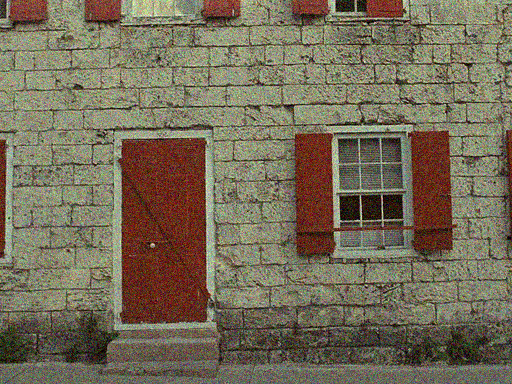

In [4]:
distorted_image_path = 'tid2008/distorted_images/I01_01_4.bmp'
Image.open(distorted_image_path)

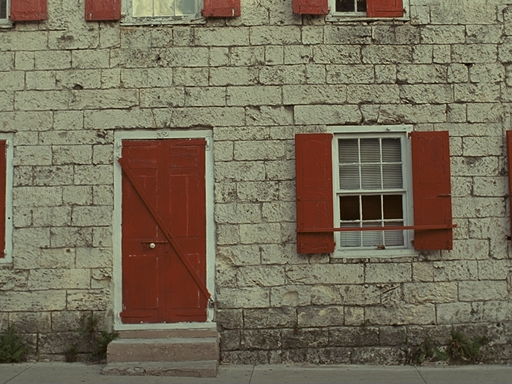

In [5]:
reference_image_path = 'tid2008/reference_images/I01.bmp'
Image.open(reference_image_path)

#### Calculate features using lib for 2 sizes of images

In [6]:
#distorted image
distorted_image = np.array(Image.open(distorted_image_path))
distorted_image_grey = rgb2gray(distorted_image)
distorted_image_grey_downsized = cv2.resize(distorted_image_grey,None,fx=1/2,fy=1/2,interpolation=cv2.INTER_CUBIC)
f_distorted = calculate_brisque_features(distorted_image_grey)
f_distorted_downsized = calculate_brisque_features(distorted_image_grey_downsized)
features = np.concatenate((f_distorted,f_distorted_downsized))
print("Distorted Image Score:",calculate_image_quality_score(features))


Distorted Image Score: 73.89802201552251


In [7]:
#reference image quality
reference_image = np.array(Image.open(reference_image_path))
reference_image_grey = rgb2gray(reference_image)
reference_image_grey_downsized = cv2.resize(reference_image_grey,None,fx=1/2,fy=1/2,interpolation=cv2.INTER_CUBIC)
f_reference = calculate_brisque_features(reference_image_grey)
f_reference_downsized = calculate_brisque_features(reference_image_grey_downsized)
features = np.concatenate((f_reference,f_reference_downsized))
print("Reference Image Score:",calculate_image_quality_score(features))

Reference Image Score: 35.21788484676742
